<a href="https://colab.research.google.com/github/valeriarpo/Business-Analytics/blob/main/7_RetoParcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelo Naive Bayes**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [ ]:
nxl = "/content/4. BD_Parcial_M_Int.xlsx"
XDB = pd.read_excel(nxl, sheet_name= 0)
XDB        #280 datos
XDB=XDB.dropna()     #Quita celdas vacias

XD=XDB[["BM","Bath","SQFT","Lot_Size","Age","Price"]]
XD

yd=XDB[["Type"]]

conteo = yd.value_counts()
porcentaje_categorias = (conteo/len(XD))*100
print(porcentaje_categorias)


Type
1       88.214286
0       11.785714
Name: count, dtype: float64


In [ ]:
mnb= GaussianNB()
mnb.fit(XD,yd)
np.set_printoptions(precision=3, suppress=True)
u = mnb.theta_      #son las medias
print("las medias de las variables son:\n", u)
sigma=np.sqrt(mnb.var_)             #desviación
print("las valores de la desviación son:\n", sigma)


Limite_Superior= u+sigma
print("los limites superiores son:\n", Limite_Superior)
Limite_Inferior= u-sigma
print("los limites inferiores son:\n", Limite_Inferior)

ydp=mnb.predict(XD)


cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es::\n", cm)

cm = confusion_matrix(yd, ydp)
VN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
VP = cm[1][1]
print("VN", VN, "FP", FP, "FN", FN, "VP", VP)

Exactitud = (VP+VN)/(VP+VN+FP+FN)
Exactitud
Sensibilidad = VP/(VP+FN)
Sensibilidad
Especificidad = VN/(VN+FP)
Especificidad
print("Exactitud", Exactitud, "Sensibilidad", Sensibilidad, "Especificidad", Especificidad)

XSC = [[3,2,1479,4791,66,800000]]
ydsc=mnb.predict(XSC)
print("La predicción de la propiedad 1 es: ", ydsc)

ABC = [[5,3,2092,3998,66,925000]]
ydsc1=mnb.predict(ABC)
print("La predicción de la propiedad 2 es: ", ydsc1)

las medias de las variables son:
 [[      6.303       4.697    3220.606    5185.         83.364 1201121.212]
 [      3.146       2.04     1766.636    5250.153      87.66  1144392.49 ]]
las valores de la desviación son:
 [[    19.363     18.953   2591.886   2062.653     30.266 955229.943]
 [    18.664     18.623    851.651   2612.861     26.21  519414.128]]
los limites superiores son:
 [[     25.666      23.65     5812.492    7247.653     113.63  2156351.155]
 [     21.81       20.663    2618.286    7863.014     113.87  1663806.618]]
los limites inferiores son:
 [[   -13.06     -14.256    628.72    3122.347     53.097 245891.27 ]
 [   -15.518    -16.582    914.985   2637.292     61.45  624978.362]]
La matriz de confusión es::
 [[  7  26]
 [  8 239]]
VN 7 FP 26 FN 8 VP 239
Exactitud 0.8785714285714286 Sensibilidad 0.9676113360323887 Especificidad 0.21212121212121213
La predicción de la propiedad 1 es:  [1]
La predicción de la propiedad 2 es:  [1]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


**Modelo Arbol de Decisión**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Se trae el modelo
from sklearn.tree import DecisionTreeClassifier  #prestamo interbibliotecario

In [ ]:
nxl = "/content/4. BD_Parcial_M_Int.xlsx"
XDB = pd.read_excel(nxl, sheet_name= 0)
XDB=XDB.dropna()    #Evitar celdas vacias
XDB.head()
#Seleccionamos las variables de interés
XD=XDB[["BM","Bath","SQFT","Lot_Size","Age","Price"]]
XD.head()                                         #Se necesita array para que los lea como números
XD=np.array(XD)           #Convierte la tabla en números
XD
yd=XDB[["Type"]] ; yd=np.array(yd)       #Variable de Salida - Convierte a la tabla

In [ ]:
mar = DecisionTreeClassifier(criterion="gini", max_depth= 4)
mar.fit(XD,yd)     #Valores de pronóstico sirven para evaluar el modelo
ydp = mar.predict(XD)

#Evaluamos el modelo
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yd, ydp)
VN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
VP = cm[1][1]
print("VN", VN, "FP", FP, "FN", FN, "VP", VP)

Exactitud = (VP+VN)/(VP+VN+FP+FN)
Exactitud
Sensibilidad = VP/(VP+FN)
Sensibilidad
Especificidad = VN/(VN+FP)
Especificidad

print("Exactitud", Exactitud, "Sensibilidad", Sensibilidad, "Especificidad", Especificidad)


VN 20 FP 13 FN 3 VP 244
Exactitud 0.9428571428571428 Sensibilidad 0.9878542510121457 Especificidad 0.6060606060606061


In [ ]:
from sklearn.tree import export_graphviz      #export graphiz es graficador
from pydotplus import graph_from_dot_data                #Que datos le voy a colocar al arbol
from google.colab import files

vs= ["BM","Bath","SQFT","Lot_Size","Age","Price"]       #Estos nombres aparecen en el arbol

dot_data=export_graphviz(mar, feature_names=vs)
graph= graph_from_dot_data(dot_data)      #Se hace gráfico del Árbol
graph.write_png("arbol.png")            #Se crea la imagén
files.download('arbol.png')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Modelo de Clusterización KNN**


In [ ]:
import pandas as pd                            #conexión con excel
import numpy as np                             #operaciones matemáticas
import matplotlib.pyplot as plt                #gráficos
import seaborn as sns                          #Para graficar distribuciónes

from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.metrics import confusion_matrix           #Matriz de confusión
from sklearn.cluster import KMeans                     #Montoncitos de datos



Este primero que acabo de hacer es de KNN, tengo que revisar si esta bien o mal

<Figure size 1000x1000 with 0 Axes>

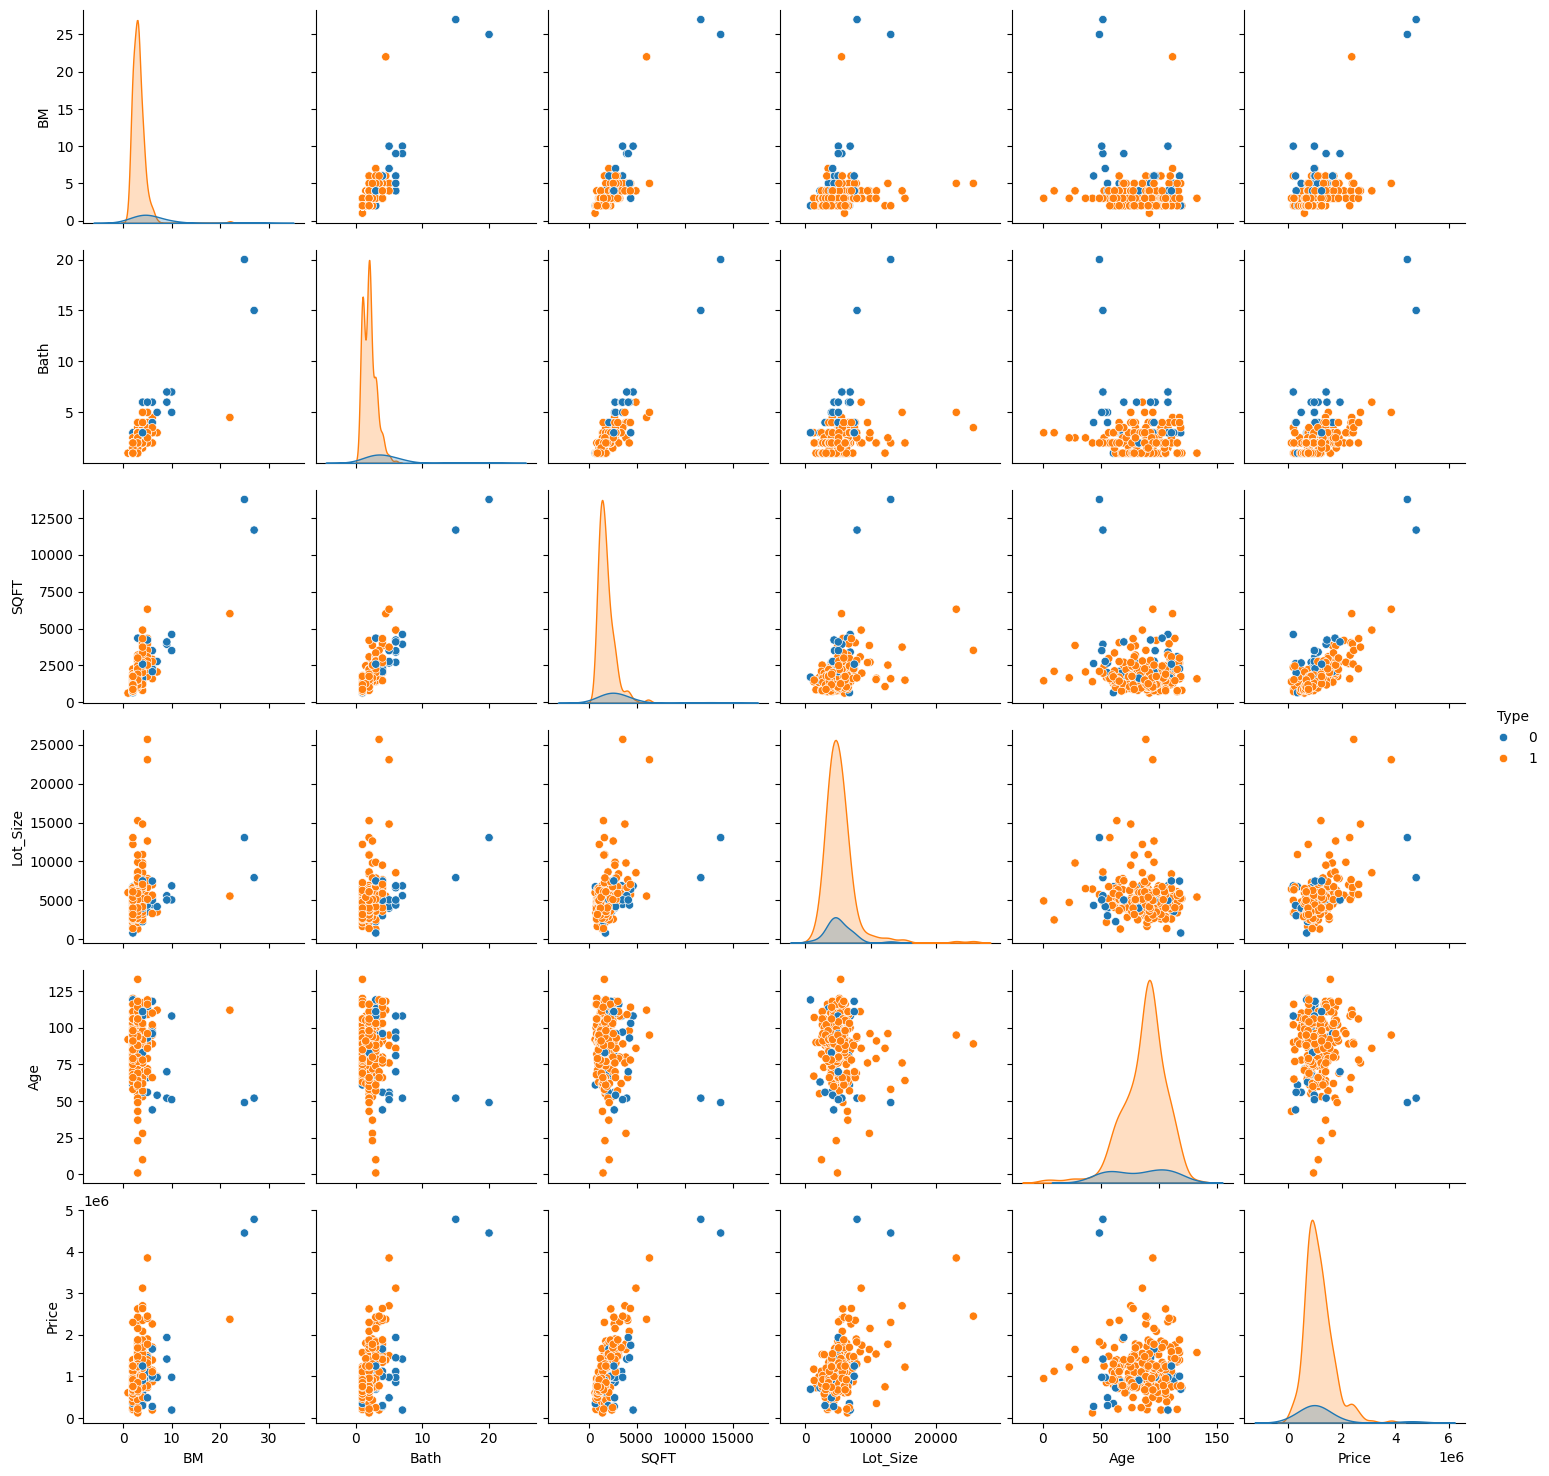

,BM,Bath,SQFT,Lot_Size,Age,Price,Type
BM,1.000000,0.812095,0.834589,0.220007,-0.122348,0.538807,-0.394785
Bath,0.812095,1.000000,0.895919,0.307301,-0.164940,0.603167,-0.483988
SQFT,0.834589,0.895919,1.000000,0.420914,-0.118593,0.755523,-0.364861
Lot_Size,0.220007,0.307301,0.420914,1.000000,-0.093683,0.511223,0.008225
Age,-0.122348,-0.164940,-0.118593,-0.093683,1.000000,-0.034638,0.072017
Price,0.538807,0.603167,0.755523,0.511223,-0.034638,1.000000,-0.031102
Type,-0.394785,-0.483988,-0.364861,0.008225,0.072017,-0.031102,1.000000


In [ ]:
nxl="/content/4. BD_Parcial_M_Int.xlsx"
XDB= pd.read_excel(nxl, sheet_name=0)                          # X data base
XDB=XDB.dropna()
XDB.head(5)

#1. Se selecciona las variables de interes
XDB=XDB[["BM","Bath","SQFT","Lot_Size","Age","Price","Type"]]

#2. Determinar la correlacion entre las variables y su impacto sobre la variable de salida

plt.figure(figsize=(10,10))
sns.pairplot(XDB, hue="Type")
plt.show()

#3. La correlación numérica es
XDB.corr()

La matriz de confusion es:
: [[  2  31]
 [  0 247]]
La exactitud es: 0.8892857142857142
La sensibilidad es: 1.0
La especificidad es: 0.06060606060606061
La propiedad 1  es: [1]
La  propiedad 2 es: [1]


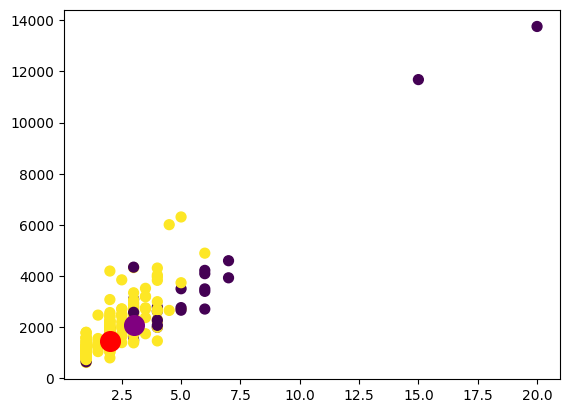

In [ ]:
XD=np.array(XDB[["BM","Bath","SQFT","Lot_Size","Age","Price"]])   #Variables de entrada
Yd=np.array(XDB["Type"])                                    #Variable de salida

Knn = KNeighborsClassifier(n_neighbors=10)                      #Evalua 10 vecinos
Knn.fit(XD,Yd)

ydp=Knn.predict(XD)

#2. Evaluamos el modelo KNN
cm=confusion_matrix(Yd,ydp)
print("La matriz de confusion es:\n:",cm)

VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
VP=cm[1,1]

Exactitud = (VP+VN)/(VP+VN+FP+FN)
Exactitud
Sensibilidad = VP/(VP+FN)
Sensibilidad
Especificidad = VN/(VN+FP)
Especificidad

print("La exactitud es:",Exactitud)
print("La sensibilidad es:",Sensibilidad)
print("La especificidad es:",Especificidad)

#3. Hacemos predicción del tipo de propiedad
XDp=np.array([[3,2,1479,4791,66,800000]])
ydpp=Knn.predict(XDp)
print("La propiedad 1  es:",ydpp)
XDp1=np.array([[5,3,2092,3998,66,925000]])
ydpp1=Knn.predict(XDp1)
print("La  propiedad 2 es:",ydpp1)
#Donde se encuentran las propiedades
plt.figure()

plt.scatter(XD[:,1],XD[:,2],c=Yd,s=50,cmap="viridis")                              #Grafico de correlacion entre BATH y SQFT
plt.scatter(XDp[:,1],XDp[:,2],marker="o", s=200, facecolors="red")
plt.scatter(XDp1[:,1],XDp1[:,2],marker="o", s=200, facecolors="purple")
plt.show()

Modelo K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


los centroides son los siguientes:
 [[      2.893       1.775    1429.115    4412.998      87.328  836089.344]
 [      3.484       2.463    1944.568    5251.432      87.716 1292431.579]
 [      4.459       3.041    3009.568    7365.573      88.    1985189.189]
 [     15.25       11.5      9160.25    13156.2        70.5   4051000.   ]
 [      3.409       2.273    1616.273    4794.091      85.364  357365.682]]


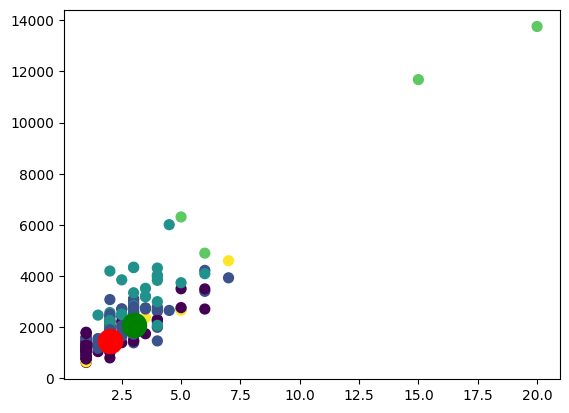

La propiedad 1 pertenece al grupo: [0]
La propiedad 2 pertenece al grupo: [0]
La matriz de confusión es:
: [[ 14   9   3   2   5]
 [108  86  34   2  17]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]
La exactitud es: 0.4608294930875576
La sensibilidad es: 0.44329896907216493
La especificidad es: 0.6086956521739131


In [ ]:
np.random.seed(42)             #Vamos a tomar las mismas semillas

#1. Construimos el modelo K-Means

k=5 #5 motoncitos de datos
mkm= KMeans(n_clusters=k, init="random", random_state=42)
mkm.fit(XD)

centroids=mkm.cluster_centers_
print("los centroides son los siguientes:\n", centroids)                       # 5 grupos de datos, contar filas

plt.figure()
plt.scatter(XD[:,1],XD[:,2],c=mkm.labels_,s=50,cmap="viridis")
plt.scatter(XDp[:,1],XDp[:,2],marker="o", s=300, facecolors="red")
plt.scatter(XDp1[:,1],XDp1[:,2],marker="o", s=300, facecolors="green")
plt.show()

ydpkm=mkm.predict(XDp)
print("La propiedad 1 pertenece al grupo:",ydpkm)

ydpkm1=mkm.predict(XDp1)
print("La propiedad 2 pertenece al grupo:",ydpkm1)

ydp2=mkm.predict(XD)
cm=confusion_matrix(Yd,ydp2)
print("La matriz de confusión es:\n:", cm)
VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
VP=cm[1,1]

Exactitud=(VP+VN)/(VP+VN+FP+FN)
Exactitud
Sensibilidad=VP/(VP+FN)
Sensibilidad
Especificidad=VN/(VN+FP)
Especificidad
print("La exactitud es:",Exactitud)
print("La sensibilidad es:",Sensibilidad)
print("La especificidad es:",Especificidad)


In [ ]:
labels=mkm.labels_
print("los labels son:\n",labels)                       #Esto indica el lugar en donde cayo cada persona

counts_1=np.bincount(labels)
print("los counts son:\n",counts_1)                    #Aparece en orden cantidad de personas en cada categoría

c01=len(np.where((labels==0) & (Yd==1))[0])
c00=len(np.where((labels==0) & (Yd==0))[0])

print("Las personas del cluster cero single family son:", c01)
print("Las personas del cluster cero multiple family  son:", c00)
print("El porcentaje de propiedades single family para el cluster 0 es:", c01/(c01+c00))
print("El porcentaje de propiedades multiple family es :", c00/(c01+c00))

c11=len(np.where((labels==1) & (Yd==1))[0])
c10=len(np.where((labels==1) & (Yd==0))[0])
print("Las personas del cluster uno single family son:", c11)
print("Las personas del cluster uno multiple family  son:", c10)

c21=len(np.where((labels==2) & (Yd==1))[0])
c20=len(np.where((labels==2) & (Yd==0))[0])
print("Las personas del cluster dos single family son:", c21)
print("Las personas del cluster dos multiple family  son:", c20)


c31=len(np.where((labels==3) & (Yd==1))[0])
c30=len(np.where((labels==3) & (Yd==0))[0])
print("Las personas del cluster tres single family son:", c31)
print("Las personas del cluster tres multiple family  son:", c30)

c41=len(np.where((labels==4) & (Yd==1))[0])
c40=len(np.where((labels==4) & (Yd==0))[0])
print("Las personas del cluster cuatro single family son:", c41)
print("Las personas del cluster cuatro multiple family  son:", c40)

los labels son:
 [4 0 1 0 0 1 0 0 2 0 2 0 0 0 0 0 0 1 0 0 1 0 0 4 0 4 4 1 0 0 1 0 0 1 0 4 1
 3 4 1 4 1 0 4 4 0 0 0 2 0 4 0 0 0 4 1 1 0 4 4 1 0 0 4 0 0 0 0 0 4 0 0 1 2
 1 4 0 2 1 2 0 1 0 3 1 2 2 2 0 4 3 4 1 2 0 0 0 1 0 0 0 1 0 0 0 0 1 2 3 0 0
 0 0 1 0 0 0 0 1 4 0 0 4 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 2 1 0 0 1 1 1 1 2 1
 1 2 1 1 2 1 2 0 1 0 1 2 1 1 0 0 0 1 1 2 1 2 1 1 0 0 2 1 1 4 0 0 0 0 1 1 0
 1 0 0 1 1 0 1 1 0 1 0 0 0 2 2 1 1 0 1 1 0 1 2 0 1 1 1 4 1 2 0 1 2 2 2 1 0
 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 2 0 1 0 1 1 1 2 1 1 2 1 2
 0 2 1 2 1 1 0 0 2 1 2 1 1 0 0 1 0 0 2 1 2]
los counts son:
 [122  95  37   4  22]
Las personas del cluster cero single family son: 108
Las personas del cluster cero multiple family  son: 14
El porcentaje de propiedades single family para el cluster 0 es: 0.8852459016393442
El porcentaje de propiedades multiple family es : 0.11475409836065574
Las personas del cluster uno single family son: 86
Las personas del cluster uno multiple family  son: 9
Las perso

**Analisis**

**KNN - Caracterización variables entrada/salida**

El modelo KNN analiza el tipo de propiedad de personas según ciertas variables. La variable que tiene mejor caracterización con el tipo de propiedad es Bath, con un valor de -0.483, lo cual es una relación un poco baja. Las variables de entrada que tienen mayor correlación entre si son Bath y SQFT con un valor de 0.8959, este es un valor alto que muestra una muy buena correlación entre estas dos variables.
Este modelo tiene una exactitud del 88.9%, la cual es muy confiable para calcular todos los valores. Una sensibilidad de 100%, la cual es perfecta para analizar datos de single family y una especificidad del 6%, esta es demasiado baja para calcular las propiedades multifamily.

**Naive Bayes**
El grupo de datos de clasificación que posee mayor antiguedad es el "1", los cuales son single familiy con una edad de 113.87. Las propiedas que poseen mayor cantidad de pies cuadrados (SQFT) con el limite superior = 5812.42 -> son las clasificatorias 0 = multiple family y lo mismo por la media la cual es de 3220 tambíen de 0 =multiple family.
El modelo es muy confiable al analizar todos los datos ya que da una exactitud de 87.8%, la sensibilidad es de 96.7% siendo esta casi perfecta al analizar tipos de casa que sean single family y la especificidad es del 21.21% la cual muestra que el modelo no es bueno para anlizar casas de multi-family/multi-occupancy.

**Modelo Arboles de Decisión**
El nodo puro con mayor cantidad de valor es (10,0) para llegar a este la regla es la siguiente
BATH > 4.75, Lot_Size < 8235.0, Lot_Size > 4147.5

La exactitud es del 94.2% lo cual es un valor muy alto y refleja alta confiabilidad en la predicción de los valores totales por parte del modelo, en la sensibilidad es del 98.7%, esto es un valor casi perfecto al analizar propiedades single family. Y finalmente la especificidad del 60.6%, este es un porcentaje medianamente bueno.

Las reglas para las propiedades con las siguientes caracteristicas son
Para la propiedad (3,2,1479,4791,66,800000) las reglas son
BATH < 4.75, BATH < 2.75, SQFT > 685, BM < 3.5
 Esta propiedad se ubica en el nodo de (1,158), lo cual nos dice que tiene
 99.37% de probabilidad de ser una single family y solo un 0.63% de ser una multiple family

Para la segunda propiedad (5,3,2092,3998,66,925000) las reglas son
BATH < 4.75, BATH > 2.75, Price < 1275000, Age < 105.
 Esta propiedad llega al nodo (7,15), lo cual nos dice que tiene una probabilidad del 31% de ser una multi family y una probabilidad del 68.1% de ser una single family.

**Modelo K-Means**
Según el modelo de K-means el cluster que tiene el lote con mayor tamaño es el tercero, con un valor de 13156.2.
La exactitud es del 46.08%, la cual es baja y no es lo suficientemente confiable para el calculo de todos los datos. La sensibilidad es del 44.3%, esta es baja para calcular las propiedades de single family y finalmente la especificidad es del 60.8% esta calcula a las propiedades de multi family, tiene un mejor porcentaje es medianamente confiable pero sigue sin ser lo suficiente. Comparando estos porcentajes con pasados como los de naive bayes, este modelo no es tan confiable como los otros, sorpresivamente el que mejor analizo los datos (especificidad) es el menos confiable para naive bayes.
El cluster que mayor cantidad de datos tiene es el cluster 0, con un total de datos de 122 datos, un total de 108 con un porcentaje del 88.52% de single family propiedades y un total de 14 multiplefamily propiedades con un porcentaje del 11.47%.
Ambos tipos de propiedades, single family y multi family, son parte del grupo 0.
